In [18]:
# import the necessary packages
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
import cv2
import PIL
from PIL import ImageEnhance
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt


In [1030]:
def pil_img_to_opencv(pil_image):
    open_cv_image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
    return open_cv_image

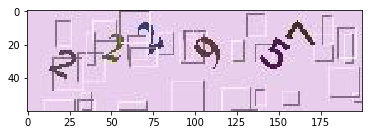

In [1035]:
image = PIL.Image.open("./test_data/1.jpg")
plt.imshow(image)

[ 232.  205.  236.]


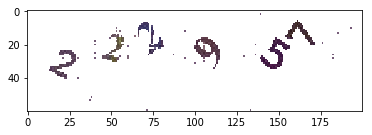

In [1036]:
im = image.convert('RGB')
data = np.array(im)
# just use the rgb values for comparison
rgb = data[:,:,:]
#color = data[5][5]   # Original value
color = np.median(data[5,:],axis=0)
print(color)
black = [0,0,0]
white = [255,255,255]
mask = np.all((rgb > color-114), axis = -1)
# change all pixels that match color to white
data[mask] = white

# change all pixels that don't match color to black
##data[np.logical_not(mask)] = black
clear_bg = PIL.Image.fromarray(data)
plt.imshow(clear_bg)

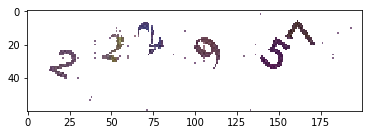

In [1037]:
enhancer = ImageEnhance.Brightness(clear_bg)
factor = 115/100
result1 = enhancer.enhance(factor)
plt.imshow(result1)

In [1038]:
orig = pil_img_to_opencv(result1)

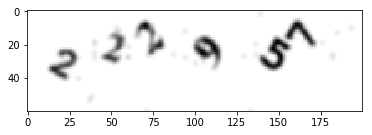

In [1039]:
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 1.3)
plt.imshow(blurred, cmap = plt.get_cmap('gray'))

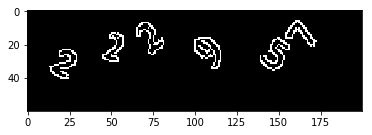

In [1040]:
edged = cv2.Canny(blurred, 10, 200)
plt.imshow(edged, cmap = plt.get_cmap('gray'))

0.0


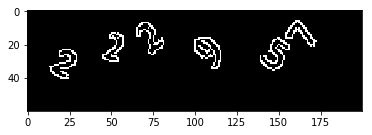

In [1041]:
ret, thresh1 = cv2.threshold(edged,0,255, cv2.THRESH_OTSU)
print(ret)
plt.imshow(thresh1, cmap = plt.get_cmap('gray'))

In [1042]:
(img, cnts, heiarachy) = cv2.findContours(thresh1.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
(cnts, boundingBoxes) = contours.sort_contours(cnts, method="left-to-right")

(13, 23, 17, 18)
(45, 13, 13, 18)
(65, 7, 17, 20)
(100, 16, 16, 19)
(139, 16, 18, 20)
(154, 6, 19, 16)


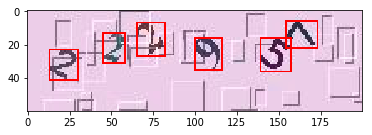

In [1043]:
digitCnts = []
output_img = pil_img_to_opencv(image).copy()
height, width = thresh1.shape
min_x, min_y = width, height
max_x = max_y = 0
# loop over the digit area candidates
for (cnt), (x, y, w, h) in zip(cnts,boundingBoxes):
    min_x, max_x = min(x, min_x), max(x+w, max_x)
    min_y, max_y = min(y, min_y), max(y+h, max_y)
    if w >= 10 and h >= 10:
        print((x, y, w, h))
        cv2.rectangle(output_img, (x,y), (x+w,y+h), (255, 0, 0), 1)
        digitCnts.append(cnt)
plt.imshow(output_img, cmap = plt.get_cmap('gray'))

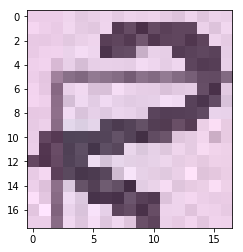

In [1044]:
clone = thresh1.copy()
x, y, w, h = boundingBoxes[0]
#cv2.rectangle(clone, (x,y), (x+w,y+h), (255, 0, 0), 1)
plt.imshow(pil_img_to_opencv(image)[y:y+h, x:x+w])

In [778]:
boundingBoxes

((17, 28, 18, 15),
 (33, 14, 16, 15),
 (85, 20, 13, 18),
 (108, 15, 14, 17),
 (134, 15, 21, 20),
 (147, 40, 8, 5),
 (169, 6, 15, 19))

In [585]:
orig[5][5]+10

array([9, 9, 9], dtype=uint8)

In [586]:
orig[5][5]

array([255, 255, 255], dtype=uint8)

In [202]:
len(cnts)

6

In [792]:
list(zip(cnts, boundingBoxes))

[(array([[[21, 23]],
  
         [[20, 24]],
  
         [[19, 24]],
  
         [[19, 27]],
  
         [[21, 27]],
  
         [[22, 26]],
  
         [[23, 26]],
  
         [[25, 28]],
  
         [[25, 29]],
  
         [[24, 30]],
  
         [[23, 30]],
  
         [[22, 31]],
  
         [[19, 31]],
  
         [[18, 32]],
  
         [[16, 32]],
  
         [[15, 33]],
  
         [[13, 33]],
  
         [[14, 34]],
  
         [[14, 36]],
  
         [[16, 38]],
  
         [[17, 38]],
  
         [[18, 39]],
  
         [[19, 39]],
  
         [[20, 40]],
  
         [[24, 40]],
  
         [[23, 39]],
  
         [[24, 38]],
  
         [[23, 37]],
  
         [[22, 37]],
  
         [[21, 36]],
  
         [[20, 36]],
  
         [[21, 37]],
  
         [[22, 37]],
  
         [[23, 38]],
  
         [[23, 39]],
  
         [[22, 40]],
  
         [[21, 40]],
  
         [[20, 39]],
  
         [[19, 39]],
  
         [[18, 38]],
  
         [[17, 38]],
  
         [[14, 3